# Universidad del Valle de Guatemala<br/>Introduccion a la Inteligencia Artificial
## Dieter de Wit 15146

# Hoja de Trabajo<br/>Regresion Lineal Regularizada

In [301]:
# External Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [302]:
def linear_cost(X, y, theta):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    return sq.sum() / (2 * m)

In [303]:
def linear_cost_derivate(X, y, theta):
    h = np.matmul(X, theta)
    m, _ = X.shape
    return np.matmul((h - y).T, X).T / m

In [304]:
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.01,
        treshold=0.0001,
        max_iter=10000):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta)
        i += 1
        costs.append(cost(X, y, theta))
        gradient_norms.append(cost_derivate(X, y, theta))
    return theta, costs, gradient_norms

In [305]:
# Import CSV
dataset = pd.read_csv("Admission_Predict.csv")
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [306]:
# Describe data to know what to analize
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [307]:
dataset = pd.read_csv('Admission_Predict.csv', usecols=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '])

training = dataset.sample(frac=0.6)
training

,GRE Score,TOEFL Score,CGPA,Chance of Admit
117,290,104,7.46,0.45
241,317,103,8.15,0.65
389,320,108,8.44,0.76
320,317,106,8.50,0.75
369,301,98,8.03,0.67
...,...,...,...,...
124,301,106,8.47,0.57
66,327,114,9.02,0.61
126,323,113,9.32,0.85
83,322,115,9.36,0.92


In [308]:
# Training with 60% of the data
y_training = np.asarray(training['Chance of Admit '])
y_training = y_training.reshape(len(y_training), 1)

ones_training = np.ones(len(y_training))

## GRE Score

y = [0.02685657]*x0 + [-0.00543232]*x1 + [0.00240606]*x2


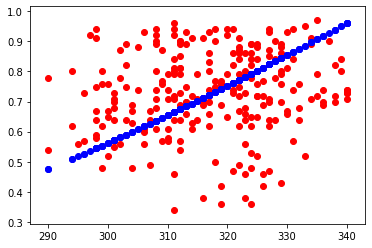

In [309]:
gre_training = np.asarray(training['GRE Score'])

X = np.vstack((ones_training, gre_training, (gre_training**2)/100)).T

m, n = X.shape
theta_0 = np.random.rand(n, 1)

theta, costs, gradient_norms = gradient_descent(
    X,
    y_training,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000001,
    treshold=0.01,
    max_iter=1000000
)

print ('y = {}*x0 + {}*x1 + {}*x2'.format(theta[0], theta[1], theta[2]))

plt.scatter(X[:, 1], y, color='red')
plt.scatter(X[:, 1], np.matmul(X, theta), color='blue')
plt.show()

## TOEFL

y = [0.71941952]*x0 + [-0.00933559]*x1 + [0.00321852]*x2


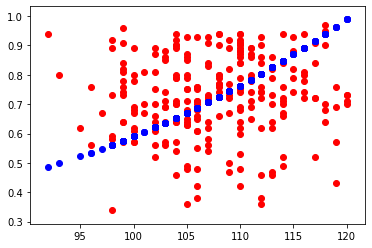

In [310]:
toefl_training = np.asarray(training['TOEFL Score'])

X = np.vstack((ones_training, toefl_training, (toefl_training**3)/4000)).T

m, n = X.shape
theta_0 = np.random.rand(n, 1)

theta, costs, gradient_norms = gradient_descent(
    X,
    y_training,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.0000001,
    treshold=0.01,
    max_iter=1000000
)

print ('y = {}*x0 + {}*x1 + {}*x2'.format(theta[0], theta[1], theta[2]))

plt.scatter(X[:, 1], y, color='red')
plt.scatter(X[:, 1], np.matmul(X, theta), color='blue')
plt.show()

## CPGA

y = [0.22278766]*x0 + [0.00626429]*x1 + [0.70618417]*x2


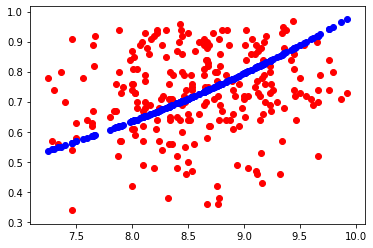

In [311]:
cpga_training = np.asarray(training['CGPA'])

X = np.vstack((ones_training, cpga_training, (cpga_training**3)/1000)).T

m, n = X.shape
theta_0 = np.random.rand(n, 1)

theta, costs, gradient_norms = gradient_descent(
    X,
    y_training,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000001,
    treshold=0.01,
    max_iter=100000
)

print ('y = {}*x0 + {}*x1 + {}*x2'.format(theta[0], theta[1], theta[2]))

plt.scatter(X[:, 1], y, color='red')
plt.scatter(X[:, 1], np.matmul(X, theta), color='blue')
plt.show()

## GRE * TOEFL * CPGA

y = [0.37757357]*x0 + [0.0093023]*x1 + [0.09222996]*x2


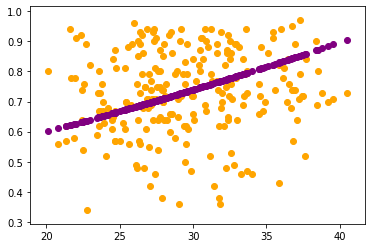

In [312]:
reg_training = gre_training * toefl_training * cpga_training

X = np.vstack((ones_training, reg_training/10000, (reg_training**2)/100000000000)).T


m, n = X.shape
theta_0 = np.random.rand(n, 1)

theta, costs, gradient_norms = gradient_descent(
    X,
    y_training,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000001,
    treshold=0.01,
    max_iter=100000
)

print ('y = {}*x0 + {}*x1 + {}*x2'.format(theta[0], theta[1], theta[2]))

plt.scatter(X[:, 1], y, color='orange')
plt.scatter(X[:, 1], np.matmul(X, theta), color='purple')
plt.show()

## GRE, TOEFL & CPGA

y = [0.63983347] + [-0.00072642]*x1 + [0.0016065]*x2 + [0.49001448]*x3


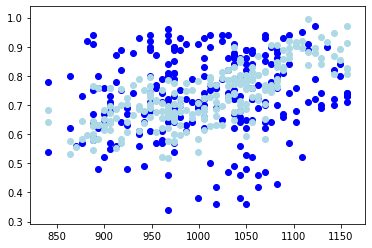

In [313]:
X = np.vstack((ones_training, (gre_training**2)/100, (toefl_training**3)/4000, (cpga_training**3)/1000)).T


m, n = X.shape
theta_0 = np.random.rand(n, 1)

theta, costs, gradient_norms = gradient_descent(
    X,
    y_training,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000001,
    treshold=0.01,
    max_iter=100000
)

print ('y = {} + {}*x1 + {}*x2 + {}*x3'.format(theta[0], theta[1], theta[2], theta[3]))

plt.scatter(X[:, 1], y, color='blue')
plt.scatter(X[:, 1], np.matmul(X, theta), color='lightblue')
plt.show()

La formula anterior predice la probabilidad de admision, donde x1 = cpga, x2 = toefl y x3 = gre

### Ya comprobado el modelo pasamos a comprobarlo a traves de un Test Set

In [314]:
# Testing with 80% of the data
testing = dataset.sample(frac=0.6)

y_testing = np.asarray(testing['Chance of Admit '])
y_testing = y_testing.reshape(len(y_testing), 1)

ones_testing = np.ones(len(y_testing))

y = [0.03015447] + [8.72223779e-05]*x1 + [0.00105144]*x2 + [0.42988002]*x3


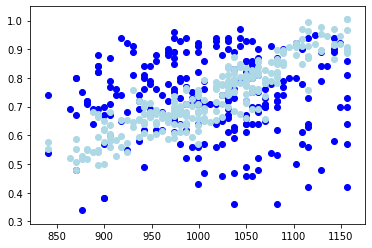

In [315]:
gre_testing = np.asarray(testing['GRE Score'])
toefl_testing = np.asarray(testing['TOEFL Score'])
cpga_testing = np.asarray(testing['CGPA'])

X = np.vstack((ones_testing, (gre_testing**2)/100, (toefl_testing**3)/4000, (cpga_testing**3)/1000)).T


m, n = X.shape
theta_0 = np.random.rand(n, 1)

theta, costs, gradient_norms = gradient_descent(
    X,
    y_testing,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.000001,
    treshold=0.01,
    max_iter=100000
)

print ('y = {} + {}*x1 + {}*x2 + {}*x3'.format(theta[0], theta[1], theta[2], theta[3]))

plt.scatter(X[:, 1], y, color='blue')
plt.scatter(X[:, 1], np.matmul(X, theta), color='lightblue')
plt.show()

### Coeficiente de Correlacion

In [316]:
sum_cf = np.sum((np.matmul(X, theta) - y_testing)**2) / len(np.matmul(X, theta))
power_y_cf = (y_testing-y_testing.mean())**2
power_X_cf = (np.matmul(X, theta)-y_testing)**2

cf = (power_y_cf.sum()-power_X_cf.sum())/power_y_cf.sum()
cf

0.7786281856517508

In [317]:
print('Predicted chance to admit = {} + {}x1 + {}x2 + {}x3'.format(np.array2string(theta[0])[1:-1], np.array2string(theta[1])[1:-1], np.array2string(theta[1])[1:-1], np.array2string(theta[2])[1:-1], np.array2string(theta[3])[1:-1]))

Predicted chance to admit = 0.03015447 + 8.72223779e-05x1 + 8.72223779e-05x2 + 0.00105144x3


Donde x1 es cpga, x2 es toefl y x3 es gpe

La conclusion de la presente hoja de trabajo seria que luego de realizar un analisis de regresion lineal con un set de entrenamiento de datos aleatoreo del 60% se pudo ajustar el modelo para poderlo extender hacia el set de datos de prueba o el completo y este ser un modelo de fiar. La formula anterior nos indica el 'Chance to Admit' predecido, que segun los valores de CPGA, TOEFL Y GRE podemos predecir la probabilidad de que la persona pueda ingresar a el estudio de posgrado. Para un analisis mas extenso del modelo planteado obtuvimos el coeficiente de correlacion, el cual, mientras mas cercano a 1 mejor. En este valor obtuvimos 0.7786 en la ultima vez que lo corrimos, como el set de datos es aleatoreo cada vez que corremos el programa este valor lo he visto variar de 0.65 a 0.8 lo que significa que el modelo y los datos proporcionados presentan correlacion. 